# How to make a clustered heatmap

Now we'll break down how to read the clustered heatmap we made in [1.3_explore_gene_dropout_via_distance_correlation_linkage_clustering](1.3_explore_gene_dropout_via_distance_correlation_linkage_clustering.ipynb)

In [38]:
# Import the pandas dataframe library
import pandas as pd

# Import the seaborn library for plotting
import seaborn as sns

# Put all the plots directly into the notebook
%matplotlib inline

Read Expression data using pandas. Notice that pandas can read URLs (!), not just files on your computer!

In [2]:
csv = "https://media.githubusercontent.com/media/olgabot/macosko2015/" \
         "master/data/05_make_rentina_subsets_for_teaching/big_clusters_expression.csv"
expression = pd.read_csv(csv, index_col=0)
print(expression.shape)
expression.head()

(300, 259)


,2010107E04RIK,4930447C04RIK,A930011O12RIK,ABCA8A,ABLIM1,ACSL3,AIPL1,ALDOC,ANK3,APLP2,...,VEGFA,VIM,VSTM2B,VSX1,VSX2,WIPI1,YWHAB,ZBTB20,ZFP365,ZFP36L1
r1_TTCCTGCTAGGC,2,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
r1_TGGAGATACTCT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
r1_CGTCTACATCCG,2,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
r1_CAAGCTTGGCGC,0,0,11,0,1,0,6,0,0,2,...,0,0,0,0,0,0,0,0,1,0
r1_ACTCACATAGAG,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0


### Exercise 1

Now use `pd.read_csv` to read the csv file of the cell metadata

In [3]:
csv = "https://media.githubusercontent.com/media/olgabot/macosko2015/" \
         "master/data/05_make_rentina_subsets_for_teaching/big_clusters_cell_metadata.csv"
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [4]:
csv = "https://media.githubusercontent.com/media/olgabot/macosko2015/" \
         "master/data/05_make_rentina_subsets_for_teaching/big_clusters_cell_metadata.csv"
cell_metadata = pd.read_csv(csv, index_col=0)
print(cell_metadata.shape)
cell_metadata.head()

(300, 4)


,cluster_id,celltype,cluster_n,cluster_celltype_with_id
r1_TTCCTGCTAGGC,cluster_24,Rods,24,Rods (cluster_24)
r1_TGGAGATACTCT,cluster_24,Rods,24,Rods (cluster_24)
r1_CGTCTACATCCG,cluster_24,Rods,24,Rods (cluster_24)
r1_CAAGCTTGGCGC,cluster_24,Rods,24,Rods (cluster_24)
r1_ACTCACATAGAG,cluster_24,Rods,24,Rods (cluster_24)


To correlate columns of dataframes in pandas, you use the function `.corr`. Let's look at the documentation of `.corr`

1. Is the default method Pearson or Spearman correlation? 
2. Can you correlate between rows, or only between columns?

In [5]:
expression_t.corr?

Object `expression_t.corr` not found.


![](figures/dont_scroll.svg)

Since `.corr` only correlates between columns, we need to **transpose** our dataframe. Here's a little animation of [matrix transposition from Wikipedia](https://en.wikipedia.org/wiki/Transpose):

![Transposing a matrix](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)

### Exercise 2
Transpose the expression matrix so the cells are the columns, which makes it easy to calculate correlations. How do you transpose a dataframe in `pandas`? (hint: google knows everything)

In [6]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [7]:
expression_t = expression.T
print(expression_t.shape)
expression_t.head()

(259, 300)


,r1_TTCCTGCTAGGC,r1_TGGAGATACTCT,r1_CGTCTACATCCG,r1_CAAGCTTGGCGC,r1_ACTCACATAGAG,r1_TAACGGACACGC,r1_CGCATGGGATAC,r1_TAACGACGCTTG,r1_TCGGCAGCCTCT,r1_TAGGATGCAAAC,...,r1_AGGGTGGGTACA,r1_AATGCTGCAAGA,r1_GTCGGGCCTTTC,r1_GGGTCAGCGGCG,r1_CTGGACCTGCCC,r1_AAGATATTGCTG,r1_GAGACCTCATGG,r1_CGGAGCGCGACA,r1_AAGGACAGATCC,r1_ATATGCACCCTA
2010107E04RIK,2,0,2,0,1,4,2,0,0,0,...,0,0,0,2,0,1,0,1,1,0
4930447C04RIK,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
A930011O12RIK,0,1,0,11,0,2,0,3,0,7,...,0,0,0,0,0,0,2,0,0,0
ABCA8A,0,0,0,0,0,0,0,0,0,0,...,1,1,4,1,3,2,1,0,0,0
ABLIM1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


### Exercise 3

Use `.corr` to calculate the **Spearman** correlation of the transposed expression dataframe. Make sure to `print` the `shape`, and show the `head` of the resulting dataframe.

In [8]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [9]:
expression_corr = expression_t.corr(method='spearman')
print(expression_corr.shape)
expression_corr.head()

(300, 300)


,r1_TTCCTGCTAGGC,r1_TGGAGATACTCT,r1_CGTCTACATCCG,r1_CAAGCTTGGCGC,r1_ACTCACATAGAG,r1_TAACGGACACGC,r1_CGCATGGGATAC,r1_TAACGACGCTTG,r1_TCGGCAGCCTCT,r1_TAGGATGCAAAC,...,r1_AGGGTGGGTACA,r1_AATGCTGCAAGA,r1_GTCGGGCCTTTC,r1_GGGTCAGCGGCG,r1_CTGGACCTGCCC,r1_AAGATATTGCTG,r1_GAGACCTCATGG,r1_CGGAGCGCGACA,r1_AAGGACAGATCC,r1_ATATGCACCCTA
r1_TTCCTGCTAGGC,1.000000,0.578489,0.592947,0.581111,0.600062,0.668730,0.562366,0.537223,0.625188,0.627728,...,-0.127396,-0.238725,-0.191087,-0.062375,-0.070431,-0.211101,0.004142,0.005390,0.028681,-0.208886
r1_TGGAGATACTCT,0.578489,1.000000,0.605171,0.668457,0.605529,0.699568,0.626681,0.619552,0.686334,0.603006,...,-0.088473,-0.164247,-0.091119,-0.012380,0.002600,-0.128525,0.110028,0.123022,0.087241,-0.151023
r1_CGTCTACATCCG,0.592947,0.605171,1.000000,0.592150,0.589383,0.616885,0.539639,0.459749,0.633616,0.563735,...,-0.110518,-0.131933,-0.131094,-0.019492,-0.019556,-0.105237,0.023963,0.057967,0.124087,-0.138839
r1_CAAGCTTGGCGC,0.581111,0.668457,0.592150,1.000000,0.614245,0.747307,0.610552,0.624505,0.670207,0.682267,...,-0.052749,-0.108256,-0.081267,-0.036022,0.048468,-0.154414,0.184313,0.051814,0.141338,-0.155600
r1_ACTCACATAGAG,0.600062,0.605529,0.589383,0.614245,1.000000,0.615884,0.642180,0.556297,0.648107,0.566039,...,-0.104368,-0.184757,-0.136784,-0.045760,0.003680,-0.183599,0.096902,0.015629,0.036012,-0.142725


### Pro tip: if your matrix is really big, here's a trick to make spearman correlations faster

Remember that spearman correlation is equal to performing pearson correlation on the ranks? Well, that's exactly what's happening inside the `.corr(method='spearman')` function! Every time it's calculating spearman, it's converting each row to ranks, which means that it's double-converting to ranks since it has to do it for each pair. Let's cut the work in half by converting to ranks FIRST. Let's take a look at the options for `.rank`:

In [10]:
expression_t.rank?

Notice we can specify `axis=1` or `axis=0`, but what does that really *mean*? Was this ascending along rows, or ascending along columns?

![](figures/ascending_across_rows_maybe.png)
![](figures/ascending_across_columns_maybe.png)


To figure this out, let's use a small, simple dataframe:

In [11]:
df = pd.DataFrame([[5, 6, 7], [5, 6, 7], [5, 6, 7]])
df

,0,1,2
0,5,6,7
1,5,6,7
2,5,6,7



### Exercise 4

Try `axis=0` when using `rank` on this `df`

In [12]:
# YOUR CODE HERE

Did that make ranks ascending along columns or along rows?


### Exercise 5

Now try `axis=1` when using `rank` on this `df`

In [13]:
# YOUR CODE HERE

Did that make ranks ascending along columns or along rows?

![](figures/ascending_across_rows_axis1.png)

![](figures/ascending_across_columns_axis0.png)

### Exercise 6


To get the gene (row) ranks for each cell (column), do we want `axis=1` or `axis=0`? Perform `.rank` on the transposed expression matrix (`expression_t`), `print` the `shape` of the resulting ranks, and show the `head()` of it.

In [14]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [15]:
ranks = expression_t.rank(axis=0)
print(ranks.shape)
ranks.head()

(259, 300)


,r1_TTCCTGCTAGGC,r1_TGGAGATACTCT,r1_CGTCTACATCCG,r1_CAAGCTTGGCGC,r1_ACTCACATAGAG,r1_TAACGGACACGC,r1_CGCATGGGATAC,r1_TAACGACGCTTG,r1_TCGGCAGCCTCT,r1_TAGGATGCAAAC,...,r1_AGGGTGGGTACA,r1_AATGCTGCAAGA,r1_GTCGGGCCTTTC,r1_GGGTCAGCGGCG,r1_CTGGACCTGCCC,r1_AAGATATTGCTG,r1_GAGACCTCATGG,r1_CGGAGCGCGACA,r1_AAGGACAGATCC,r1_ATATGCACCCTA
2010107E04RIK,243.0,106.0,239.0,95.5,231.5,241.5,241.0,109.0,112.0,109.0,...,88.5,79.5,70.5,181.0,85.5,141.5,77.5,210.0,153.5,96.5
4930447C04RIK,112.0,106.0,111.0,95.5,112.0,103.5,111.0,109.0,112.0,109.0,...,88.5,79.5,156.5,62.0,191.0,141.5,77.5,95.5,68.0,208.5
A930011O12RIK,112.0,222.0,111.0,246.5,112.0,225.0,111.0,253.5,112.0,252.5,...,88.5,79.5,70.5,62.0,85.5,63.0,216.0,95.5,68.0,96.5
ABCA8A,112.0,106.0,111.0,95.5,112.0,103.5,111.0,109.0,112.0,109.0,...,198.0,177.0,219.0,146.5,234.0,172.5,179.0,95.5,68.0,96.5
ABLIM1,230.5,106.0,111.0,200.0,112.0,103.5,111.0,109.0,112.0,109.0,...,198.0,79.5,70.5,62.0,85.5,141.5,179.0,95.5,68.0,96.5



### Exercise 6

Now that you're armed with all this information, we'll calculate the ranks. While you're at it, let's compare the time it takes to run ("runtime") of `.corr(method="pearson")` on the ranks matrix vs `.corr(method="spearman")` on the expression matrix.

1. Perform **pearson** correlation on the ranks
2. Check that it is equal to the expression **spearman** correlation.
3. Use the `%timeit` magic to check the runtimes of `.corr` on the ranks and expression matrices. (Feel free to calculate the expression correlation again, below)
    1. Note that when you use `timeit`, you cannot assign any variables -- using an equals sign doesn't work here.
4. How much time did it take, in comparison? What's the order of magnitude difference?


Use as many cells as you need.

In [16]:
# YOUR CODE HERE

In [17]:
# YOUR CODE HERE

In [18]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [21]:
%timeit expression_t.corr(method='spearman')
%timeit ranks.corr(method='pearson')

1.83 s ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
36.1 ms ± 7.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
ranks_corr = ranks.corr(method='pearson')
print(ranks_corr.shape)
ranks_corr.head()

(300, 300)


,r1_TTCCTGCTAGGC,r1_TGGAGATACTCT,r1_CGTCTACATCCG,r1_CAAGCTTGGCGC,r1_ACTCACATAGAG,r1_TAACGGACACGC,r1_CGCATGGGATAC,r1_TAACGACGCTTG,r1_TCGGCAGCCTCT,r1_TAGGATGCAAAC,...,r1_AGGGTGGGTACA,r1_AATGCTGCAAGA,r1_GTCGGGCCTTTC,r1_GGGTCAGCGGCG,r1_CTGGACCTGCCC,r1_AAGATATTGCTG,r1_GAGACCTCATGG,r1_CGGAGCGCGACA,r1_AAGGACAGATCC,r1_ATATGCACCCTA
r1_TTCCTGCTAGGC,1.000000,0.578489,0.592947,0.581111,0.600062,0.668730,0.562366,0.537223,0.625188,0.627728,...,-0.127396,-0.238725,-0.191087,-0.062375,-0.070431,-0.211101,0.004142,0.005390,0.028681,-0.208886
r1_TGGAGATACTCT,0.578489,1.000000,0.605171,0.668457,0.605529,0.699568,0.626681,0.619552,0.686334,0.603006,...,-0.088473,-0.164247,-0.091119,-0.012380,0.002600,-0.128525,0.110028,0.123022,0.087241,-0.151023
r1_CGTCTACATCCG,0.592947,0.605171,1.000000,0.592150,0.589383,0.616885,0.539639,0.459749,0.633616,0.563735,...,-0.110518,-0.131933,-0.131094,-0.019492,-0.019556,-0.105237,0.023963,0.057967,0.124087,-0.138839
r1_CAAGCTTGGCGC,0.581111,0.668457,0.592150,1.000000,0.614245,0.747307,0.610552,0.624505,0.670207,0.682267,...,-0.052749,-0.108256,-0.081267,-0.036022,0.048468,-0.154414,0.184313,0.051814,0.141338,-0.155600
r1_ACTCACATAGAG,0.600062,0.605529,0.589383,0.614245,1.000000,0.615884,0.642180,0.556297,0.648107,0.566039,...,-0.104368,-0.184757,-0.136784,-0.045760,0.003680,-0.183599,0.096902,0.015629,0.036012,-0.142725


Use *inequality* to see if any points are not the same. If this is equal to zero, then we know that they are ALL the same.

In [29]:
(ranks_corr != expression_corr).sum().sum()

0

This is a flip of checking for equality, which is a little trickier because then you have to know exactly how many items are in the matrix. Since we have a 300x300 matrix, that multiplication is a little easier to do in your head and know that you got the right answer.

In [30]:
(ranks_corr == expression_corr).sum().sum()

90000

### Make a heatmap!!

Now we are ready to make a clustered heatmap! We'll use `seaborn`'s `sns.clustermap`. Let's read the documentation for `sns.clustermap`. What is the default distance metric and linkage method?

In [31]:
sns.clustermap?


### Exercise 7

Now run `sns.clustermap` on either the ranks or expression correlation matrices, since they are equal :)

In [32]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [33]:
sns.clustermap(expression_corr)

/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


How can we add the colors labeling the rows and columns? Check the documentation for `sns.clustermap` again:

### Exercise 8

In [34]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [35]:
sns.clustermap?

Since I am not a color design expert, I defer to color design experts in choosing my color palettes. One such expert is Cynthia Brewer, who made a [ColorBrewer](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) (hah!) list of color maps for both increasing quantity (shades), and for categories (differing colors).

As a reference, I like using [this demo of every ColorBrewer scale](https://bl.ocks.org/mbostock/5577023). Hover over the palette to see its name.


Thankfully, `seaborn` has the ColorBrewer color maps built-in. Let's see what this output is

Remember -- we never make a variable without looking at it first!!

In [36]:
palette = sns.color_palette('Accent')
palette

[(0.49803921568627452, 0.78823529411764703, 0.49803921568627452),
 (0.74509803921568629, 0.68235294117647061, 0.83137254901960789),
 (0.99215686274509807, 0.75294117647058822, 0.52549019607843139),
 (1.0, 1.0, 0.59999999999999998),
 (0.2196078431372549, 0.42352941176470588, 0.69019607843137254),
 (0.94117647058823528, 0.0078431372549019607, 0.49803921568627452)]

Huh that's a bunch of weird numbers. What do they mean? Turns out it's a value from 0 to 1 representing the red, green, and blue (RGB) color channels that computers understand. But I'm not a computer .... what am I supposed to do??

Turns out, `seaborn` also has a very convenient function called `palplot` to plot the entire palette. This lets us look at the variable without having to convert from RGB

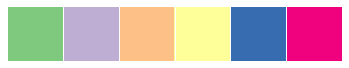

In [39]:
sns.palplot(palette)

### Exercise 9

* Get the color palette for the "Set2" colormap and specify that you want 5 colors (read the documentation of `sns.color_palette`
* Plot the color palette

In [40]:
# YOUR CODE HERE

In [41]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

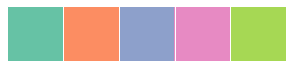

In [42]:
set2 = sns.color_palette('Set2', n_colors=5)
sns.palplot(set2)

If you are more advanced and want access to more colormaps, I recommend checking out [`palettable`](https://jiffyclub.github.io/palettable/).

## Assign colors to clusters

To set a specific color to each cluster, we'll need to see the unique clusters here. For an individual column (called a "Series" in pandas-speak), how can we get only the unique items?

### Exercise 10

Get the unique values from the column `"cluster_celltype_with_id"`. Remember, always look at the variable you created!

In [43]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [44]:
cluster_ids_unique = cell_metadata['cluster_celltype_with_id'].unique()
cluster_ids_unique

array(['Rods (cluster_24)', 'Cones (cluster_25)',
       'Bipolar cells (cluster_26)', 'Bipolar cells (cluster_27)',
       'Bipolar cells (cluster_33)', 'Muller glia (cluster_34)'], dtype=object)

## Detour: `zip` and `dict`

To map colors to each cluster name, we need to talk about some built-in functions in Python, called `zip` and `dict`

For this next part, we'll use the built-in function `zip` which is very useful. It acts like a *zipper* (like for clothes) to glue together the pairs of items in two lists:


In [70]:
english = ["hello", "goodbye", "no", "yes", "please", "thank you",]
spanish = ["hola", "adios", "no", "si", "por favor", "gracias"]
zip(english, spanish)

To be memory efficient, this doesn't show us what's inside right away. To look inside a `zip` object, we can use `list`:

In [71]:
list(zip(english, spanish))

[('hello', 'hola'),
 ('goodbye', 'adios'),
 ('no', 'no'),
 ('yes', 'si'),
 ('please', 'por favor'),
 ('thank you', 'gracias')]

### Exercise 11

What happened to  "please" and "thank you" from `english`? Make another list, called `spanish2`, that contains the Spanish words for "please" and "thank you" (again, google knows everything), then call `zip` on `english` and `spanish2`. Don't forget to use `list` on them!

In [72]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [73]:
english = ["hello", "goodbye", "no", "yes", "please", "thank you",]
spanish = ["hola", "adios", "no", "si", "por favor", "gracias"]
list(zip(english, spanish))

[('hello', 'hola'),
 ('goodbye', 'adios'),
 ('no', 'no'),
 ('yes', 'si'),
 ('please', 'por favor'),
 ('thank you', 'gracias')]

Now we'll use a dictionary `dict` to make a lookup table that uses the pairing made by `zip`, using the first item as the "key" (what you use to look up) and the second item as the "value" (the result of the lookup)

You can think of it as a translator -- use the word in English to look up the word in Spanish.

In [76]:
english_to_spanish = dict(zip(english, spanish))
english_to_spanish

{'goodbye': 'adios',
 'hello': 'hola',
 'no': 'no',
 'please': 'por favor',
 'thank you': 'gracias',
 'yes': 'si'}

Now we can use English words to look up the word in Spanish! We use the square brackets and the english word we want to use, to look up the spanish word.

In [77]:
english_to_spanish['hello']

'hola'

### Exercise 12

Make an `spanish_to_english` dictionary and look up the English word for "por favor"

In [83]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [81]:
spanish_to_english = dict(zip(spanish, english))
spanish_to_english['por favor']

'please'

Okay, detour over! Switching from linguistics back to biology :)

### Exercise 13

Use `dict` and `zip` to create a variable called `id_to_color` that assigns labels in `cluster_ids_unique` to a color in `set2`

In [84]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [82]:
id_to_color = dict(zip(cluster_ids_unique, set2))
id_to_color

{'Bipolar cells (cluster_26)': (0.55294117647058827,
  0.62745098039215685,
  0.79607843137254897),
 'Bipolar cells (cluster_27)': (0.90588235294117647,
  0.54117647058823526,
  0.76470588235294112),
 'Bipolar cells (cluster_33)': (0.65098039215686276,
  0.84705882352941175,
  0.32941176470588235),
 'Cones (cluster_25)': (0.9882352941176471,
  0.55294117647058827,
  0.3843137254901961),
 'Rods (cluster_24)': (0.40000000000000002,
  0.76078431372549016,
  0.6470588235294118)}

### Exercise XX



In [ ]:
cluster_colors = [id_to_color[i] for i in cell_metadata['cluster_celltype_with_id']]
cluster_colors

### Exercise XX

Now use the cluster colors to label the rows and columns in `sns.clustermap`. How can 

In [49]:
# YOUR CODE HERE

In [ ]:
![](figures/dont_scroll.svg)

In [ ]:
sns.clustermap(expression_corr, row_labels=cluster_colors, col_colors=cluster_colors)